<a href="https://colab.research.google.com/github/Trellises/LTClass-Code/blob/main/Latrell_ThompsonHourlyEnergyProjri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

These are some important libraries used for python to enhance the data and minipulate the data.

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pdb

from tensorflow.keras import layers
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False
from sklearn import preprocessing

Used to upload the file 'AEP_hourly' Which contains all the data for the model. This data will have a list of MagaWatts of energy used in a household. These come from a list of Interconnected Grid that has data from 16 states.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AEP_hourly.csv to AEP_hourly.csv


Reads in the file and makes sure that  it can properly and changes the column so that it is a datetime column along with the MegaWatts column.

In [ ]:
df = pd.read_csv('AEP_hourly.csv')
df['Datetime'] = pd.to_datetime(df['Unnamed: 0'])

In [ ]:
print(df.dtypes)

Unnamed: 0            object
AEP_MW                 int64
Datetime      datetime64[ns]
dtype: object


This code is meant to that the clolum is names datetime and the the other is read and read in the other data as well.

In [ ]:
df = pd.read_csv('AEP_hourly.csv', parse_dates = True)
df
df.rename(columns={'Unnamed: 0': 'Datetime'}, inplace = True)

print(df.head())  \
print(df.info())

          Datetime  AEP_MW
0  12/31/2004 1:00   13478
1  12/31/2004 2:00   12865
2  12/31/2004 3:00   12577
3  12/31/2004 4:00   12517
4  12/31/2004 5:00   12670
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  121273 non-null  object
 1   AEP_MW    121273 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB
None


In [ ]:
#Takes the file and reads reads it,
#df = pd.read_csv('AEP_hourly.csv', parse_dates=True)
#df.rename(columns={'Unnamed: 0': 'Datetime'}, inplace=True)


In [ ]:
#df

The file 'AEP_MW' is the file that needs to downloaded and used to makes sure the data is being drawn. From the column 'AEP_MW'. That colummn is a showing of the recording of hourly energy in each household. This data only contains one feature.

We load the file in and then we have to rename the first column. Since there was no name first column it is now being renamed to 'Datetime'. It now will hold the timestamps for the data table. The are real datetime objects. The datetime column is then set to become a index of the dataframe.

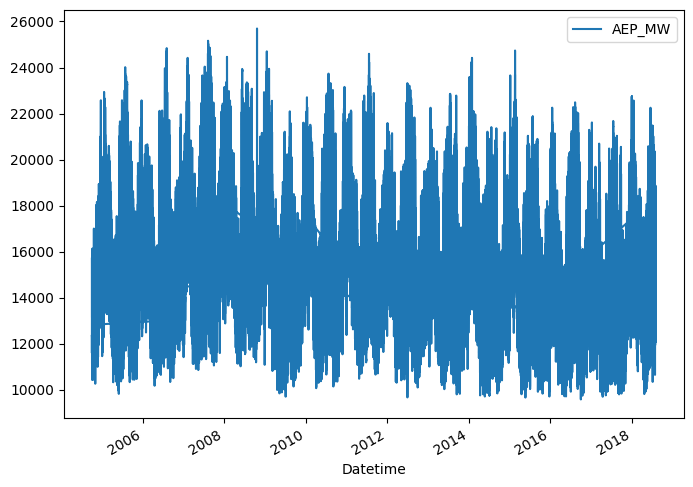

In [ ]:
df.rename(columns = {'Unnamed: 0': 'Datetime'}, inplace=True)
thePlot =  ['AEP_MW']
plot_specs = df[thePlot]
date_time = pd.to_datetime(df['Datetime'])
plot_specs.index = date_time
_ = plot_specs.plot(subplots=True)
plt.show()

We have a dataset called df, and what we’re trying to do is split it into three parts:

A training set (for teaching our model),
A validation set (for tuning the model),
A test set (for checking how good the model really is).
We take the first 70% of the rows to be our training data. This is the data we actually use to teach the model.

We grab the next 20% for validation. Validation is like giving the model a mini-test while it’s learning — to see if it's doing well, but without using the real final test yet

We grab the last 10% for testing. This is where we finally ask, "Alright model, did you really learn anything?" — and we check its performance for real.

In [ ]:
column_indices = {name:i for i, name in enumerate(df)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
#Data was split into training (70%), validation (20%), and testing (10%) subsets for effective model evaluation.

In [ ]:
df_2 = df.copy()

df_2['timestamp'] = pd.to_datetime(df_2['Datetime'])
df_2['Year'] = df_2['timestamp'].dt.year
df_2['Month'] = df_2['timestamp'].dt.month

scaler_for_data = preprocessing.MinMaxScaler()

file_1 = ['AEP_MW']

scaler_for_data = preprocessing.MinMaxScaler()
scaled_data = scaler_for_data.fit_transform(df_2[['AEP_MW']]) # Only scale 'AEP_MW'
scaled_df = df_2.copy()
scaled_df['AEP_MW'] = scaled_data[:, 0]

In [ ]:
#print("Train data")
#print(train_df.head())

#print("Validation data")
#print(val_df.head())

#print("Test data")
#print(test_df.head())

<Axes: >

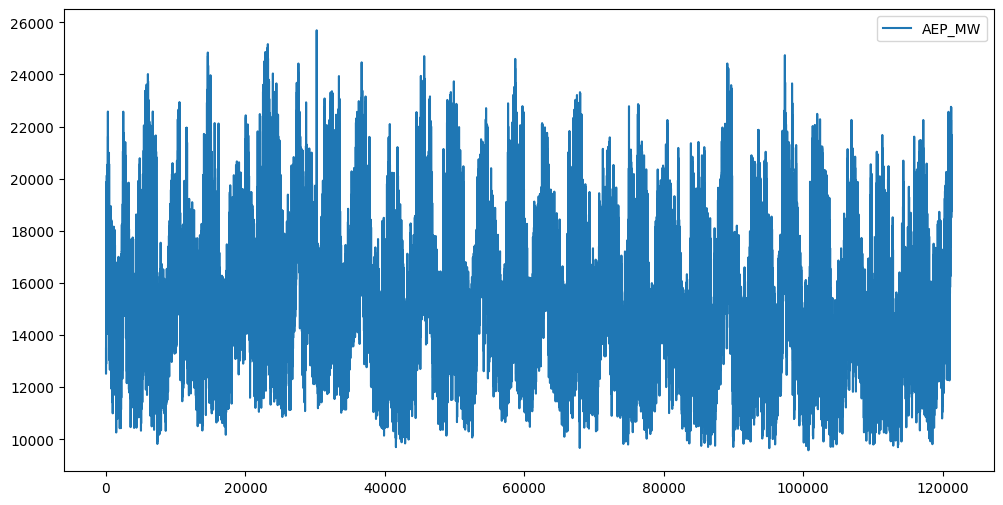

In [ ]:
df.plot(figsize=(12,6))

plot the results after 80,000 to get a trending data. Plot that trending data so that we can see the plot.

In [ ]:
#Reshaping the data

#train_data = train_df['AEP_MW'].values.reshape(-1,1)
#val_data = val_df['AEP_MW'].values.reshape(-1,1)
#test_data = test_df['AEP_MW'].values.reshape(-1,1)

#scaler_for_data = MinMaxScaler()

#scaler_for_data.fit(train_df)

 #Data was scaled using MinMaxScaler to normalize values between 0 and 1,
  #speeding up model improving accuracy.

#xscaled x - x min/x max -x min
#used to normalize the data

In [ ]:
train_scaled_df = scaled_df[0:int(n*0.7)].drop('Datetime', axis = 1)

val_scaled_df = scaled_df[int(n*0.7):int(n*0.9)].drop('Datetime', axis = 1)

test_scaled_df = scaled_df[int(n*0.9):].drop('Datetime', axis = 1)

In [ ]:
y_train = train_scaled_df['AEP_MW'].values
y_val = val_scaled_df['AEP_MW'].values
y_test = test_scaled_df['AEP_MW'].values


X_train = train_scaled_df.drop('AEP_MW', axis=1)
X_val = val_scaled_df.drop('AEP_MW', axis=1)
X_test = test_scaled_df.drop('AEP_MW', axis=1)


y_train = train_scaled_df['AEP_MW'].values
y_val = val_scaled_df['AEP_MW'].values
y_test = test_scaled_df['AEP_MW'].values

In [ ]:
train_scaled_df

,AEP_MW,timestamp,Year,Month
0,0.241839,2004-12-31 01:00:00,2004,12
1,0.203798,2004-12-31 02:00:00,2004,12
2,0.185925,2004-12-31 03:00:00,2004,12
3,0.182202,2004-12-31 04:00:00,2004,12
4,0.191697,2004-12-31 05:00:00,2004,12
...,...,...,...,...
84886,0.442410,2014-07-26 19:00:00,2014,7
84887,0.414422,2014-07-26 20:00:00,2014,7
84888,0.397977,2014-07-26 21:00:00,2014,7
84889,0.388668,2014-07-26 22:00:00,2014,7


In [ ]:
train_scaled_df.shape

(84891, 4)

In [ ]:

#Input Window=data[t,t+input_width]
#Label Window=data[t+input_width,t+input_width+label_width]

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=None, val_df=None, test_df=None,
                 label_columns=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}


        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns],
                              axis=-1)


        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, model=None, plot_col='AEP_MW', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(max_n, 1, n + 1)
            plt.ylabel(f'{plot_col} [normal]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

    def make_dataset(self, data):
            if 'timestamp' in data.columns:
              data['timestamp'] = data['timestamp'].astype('int64') // 10**9

            data = np.array(data, dtype=np.float32)
            ds = tf.keras.preprocessing.timeseries_dataset_from_array(
              data=data,
              targets=None,
              sequence_length=self.total_window_size,
              sequence_stride=1,
              shuffle=True,
              batch_size=32,
            )
            ds = ds.map(self.split_window)
            return ds


    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = next(iter(self.train))
        self._example = result
        return result

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
      LT_my_result = getattr(self, '_example', None)
      if result is None:

        LT_my_result = next(iter(self.train))
        self._example = LT_my_result
      return LT_my_result


In [ ]:
window_size=24
single_step_window = WindowGenerator(
    input_width=window_size,
    label_width=1,
    shift=1,
    train_df=train_scaled_df,
    val_df=val_scaled_df,
    test_df=test_scaled_df,
    label_columns=['AEP_MW']
)

print(single_step_window)

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): ['AEP_MW']


In [ ]:
print(f"Training set length: {len(train_df)}")
print(f"Validation set length: {len(val_df)}")
print(f"Test set length: {len(test_df)}")

Training set length: 84891
Validation set length: 24254
Test set length: 12128


In [ ]:
# Inspect a batch of inputs and labels
for inputs, labels in single_step_window.train.take(1):
    print("Inputs shape:", inputs.shape)  # Should be (batch_size, input_width, num_features)
    print("Labels shape:", labels.shape)

Inputs shape: (32, 24, 4)
Labels shape: (32, 1, 1)


[link text](https://)

 For each window, a sequence of 7 points was created as input (X), and the following point was used as the label (Y).

In [ ]:

from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True, activation='relu',
                         input_shape=(window_size, train_scaled_df.shape[1])),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])


lstm_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)



MAX_EPOCHS = 20

history = lstm_model.fit(
    single_step_window.train,
    epochs=MAX_EPOCHS,
    validation_data=single_step_window.val
)

test_loss, test_mae = lstm_model.evaluate(single_step_window.test)
print(f"Test Loss: {test_loss}, Test Mean Absolute Error: {test_mae}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 314s 117ms/step - loss: 0.0743 - mae: 0.1968 - val_loss: 0.0268 - val_mae: 0.1343
Epoch 2/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 297s 112ms/step - loss: 0.0260 - mae: 0.1290 - val_loss: 0.0284 - val_mae: 0.1406
Epoch 3/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 338s 118ms/step - loss: 0.0257 - mae: 0.1283 - val_loss: 0.0264 - val_mae: 0.1316
Epoch 4/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 313s 118ms/step - loss: 0.0255 - mae: 0.1278 - val_loss: 0.0275 - val_mae: 0.1372
Epoch 5/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 322s 118ms/step - loss: 0.0255 - mae: 0.1277 - val_loss: 0.0278 - val_mae: 0.1383
Epoch 6/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 313s 118ms/step - loss: 0.0253 - mae: 0.1273 - val_loss: 0.0280 - val_mae: 0.1392
Epoch 7/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 299s 110ms/step - loss: 0.0253 - mae: 0.1272 - val_loss: 0.0286 - val_mae: 0.1410
Epoch 8/20
2653/2653 ━━━━━━━━━━━━━━━━━━━━ 292s 110ms/step - loss: 0.0252 - mae: 0.1272 - val_loss: 0.0286 - val_mae: 0.1410
Epoch 9/

In [ ]:
print (y_pred_scaled)

NameError: name 'y_pred_scaled' is not defined

In [ ]:
print("Original y_test:", y_test['target_column'].values[:10])
print("Unscaled y_test after inverse transform:", y_test_unscaled[:10].flatten())

In [ ]:
print(y_test_unscaled)

In [ ]:
single

In [ ]:

y_pred_scaled = lstm_model.predict(single_step_window.test)


y_true = []
for _, labels in single_step_window.test:
    y_true.append(labels.numpy())
y_true = np.concatenate(y_true, axis=0)

y_test_unscaled = scaler_for_data.inverse_transform(y_true.reshape(-1, 1))
y_pred_unscaled = scaler_for_data.inverse_transform(y_pred_scaled)


from sklearn.metrics import mean_absolute_error
mae_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)

print(f"Unscaled Test MAE: {mae_unscaled} ")

In [ ]:
predictions = lstm_model.predict(single_step_window.test)


if predictions.shape[1] != 1:
    predictions = predictions.reshape(-1, 1)

unscaled_predictions = scaler_for_data.inverse_transform(predictions)

unscaled_actuals = scaler_for_data.inverse_transform(test_scaled_df[['AEP_MW']].values)

unscaled_actuals = unscaled_actuals[-len(unscaled_predictions):]

mse_unscaled = mean_squared_error(unscaled_predictions, unscaled_actuals)
print(f"Mean Squared Error (Unscaled Data): {mse_unscaled}")

In [ ]:


y_pred = lstm_model.predict(single_step_window.test)
y_true = []
for _, labels in single_step_window.test:
    y_true.append(labels.numpy())

y_true = np.concatenate(y_true, axis=0)
y_pred = y_pred.reshape(-1)

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  y_true = y_true.reshape(-1)
  nonzero_indices = y_true != 0
  return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100


mape = mean_absolute_percentage_error(y_true, y_pred)


print(f"Test Loss: {test_loss:.4f}")
print(f"Test Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



In [ ]:


y_pred_scaled = lstm_model.predict(single_step_window.test)


y_true = []
for _, labels in single_step_window.test:
    y_true.append(labels.numpy())
y_true = np.concatenate(y_true, axis=0)

y_test_unscaled = scaler_for_data.inverse_transform(y_true.reshape(-1, 1))
y_pred_unscaled = scaler_for_data.inverse_transform(y_pred_scaled)


mape_unscaled = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100

print(f"Unscaled Test MAPE: {mape_unscaled:.2f}%")

In [ ]:
predictions = lstm_model.predict(single_step_window.test)

predictions = predictions.reshape(-1, 1)


#unscaled_predictions = scaler_for_data.inverse_transform(predictions)
#unscaled_actuals = scaler_for_data.inverse_transform(test_scaled_df[['AEP_MW']].values)
#unscaled_actuals = unscaled_actuals[-len(unscaled_predictions):]


mse_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)
print(f"Mean Squared Error (Unscaled Data): {mse_unscaled}")

In [ ]:
actual_values = unscaled_actuals

plt.plot(df.index[:len(actual_values)], actual_values, label='Actual', color='blue')

Uses All the values in the test data set in order to get the MAPE

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


In [ ]:
print(test_df)
print(single_step_window.test_df.shape)

In [ ]:
predictions_scaled = lstm_model.predict(single_step_window.test)
predictions_unscaled = scaler_for_data.inverse_transform(predictions_scaled)
actual_unscaled = scaler_for_data.inverse_transform(test_scaled_df)

plt.figure(figsize=(12, 6))
plt.plot(actual_unscaled[-len(predictions_unscaled):], label='Actual')
plt.plot(predictions_unscaled, label='Predicted')
plt.xlabel('Time')
plt.ylabel('AEP_MW')
plt.legend()
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

In [ ]:
print(predictions_scaled[10000:12000])


In [ ]:
print(df['AEP_MW'][10000:12000])

In [ ]:
plt.figure(figsize=(12, 6))
start_idx = 11000
end_idx = 12000

plt.plot(df['Datetime'][start_idx:end_idx], df['AEP_MW'][start_idx:end_idx], label='Actual', color='blue')
plt.plot(df['Datetime'][start_idx:end_idx], predictions_unscaled[start_idx:end_idx], label='Predicted', color='red')

plt.xlabel('Time')
plt.ylabel('Energy Consumption (MW)')
plt.title('Actual vs Predicted Energy Usage (11,000 to 12,000)')
plt.legend()
plt.show()

In [ ]:
predictions_unscaled = scaler_for_data.inverse_transform(predictions_scaled)
plt.figure(figsize=(12, 6))

plt.plot(predictions_unscaled, label='Predicted')
plt.xlabel('Time')
plt.ylabel('AEP_MW')
plt.legend()
plt.title('Prediction Graph')
plt.show()


In [ ]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index = 0):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
      result = inputs[:, :, self.label_index]
      return result[:, :, tf.newaxis]



In [ ]:
print(df.index)

In [ ]:
print(df['Datetime'].dtype)

In [ ]:
baseline = Baseline(label_index=0)

baseline.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)



In [ ]:
baseline_result = baseline.evaluate(single_step_window.test)
print("Baseline Results: ", baseline_result)

In [ ]:
one_day_window = WindowGenerator(
    input_width=24,
    label_width=24,
    shift=1,
    label_columns=['AEP_MW'],
    train_df=train_df,
    val_df=val_df,  # Pass validation DataFrame
    test_df=test_df  # Pass test DataFrame
)

In [ ]:
one_day_window.plot(baseline)

In [ ]:
wide_window = WindowGenerator(
    input_width=720, label_width=720, shift=1,
    label_columns=['AEP_MW'],
    train_df=train_df,
    val_df=val_df,
    test_df=test_df
)



In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}, MAE: {mae}")

Compare to Quantum Lstm